In [28]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [30]:
df = pd.read_csv("../Python/Output/RegrSin_18.txt", sep='\t')
df.head()

,Order,Index,Quart Value,Quart Uncertainty,Regr Value,Regr Uncertainty,Regr Error,Regr Normalized
0,0,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0,131072,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000
2,1,65536,0.707107,6.409876e-17,0.707107,6.409876e-17,0.000000e+00,0.000000
3,2,32768,0.382683,3.204938e-17,0.382683,5.273151e-17,-5.551115e-17,-1.052713
4,2,98304,0.923880,6.409876e-17,0.923880,6.640403e-17,0.000000e+00,0.000000


In [31]:
df = df.sort_values('Index')
df['Order'].unique()

array([ 0, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1], dtype=int64)

<AxesSubplot:title={'center':'Regression vs Quart $sin(\\pi\\; j/2^L)$'}, xlabel='Index j', ylabel='Uncertainty'>

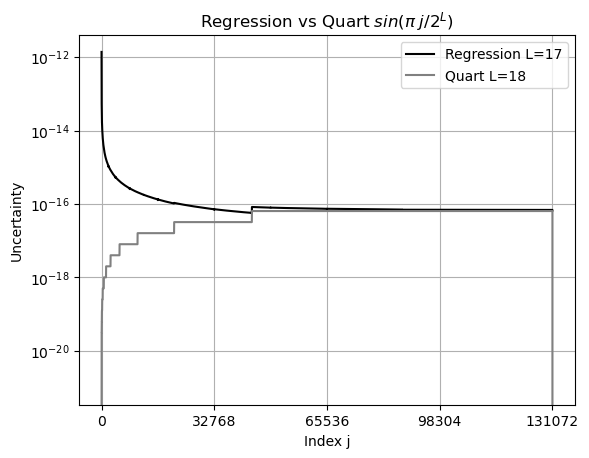

In [32]:
ax = df[df['Order'] == 17].plot(x='Index', y='Regr Uncertainty',  c='black', ls='-', label='Regression L=17')
df.plot(ax = ax, x='Index', y='Quart Uncertainty', c='gray', ls='-', label='Quart L=18',
        logy=True, grid=True, xlabel="Index j", ylabel = 'Uncertainty', xticks = range(0, 2**17 + 1, 2**15),
        title=r'Regression vs Quart $sin(\pi\; j/2^L)$')

In [34]:
df['Regr Precision'] = df['Regr Uncertainty'] / df['Quart Value']
df['Quart Precision'] = df['Quart Uncertainty'] / df['Quart Value']

<AxesSubplot:title={'center':'Regression vs Quart $sin(\\pi\\; j/2^L)$'}, xlabel='Index j', ylabel='Precision'>

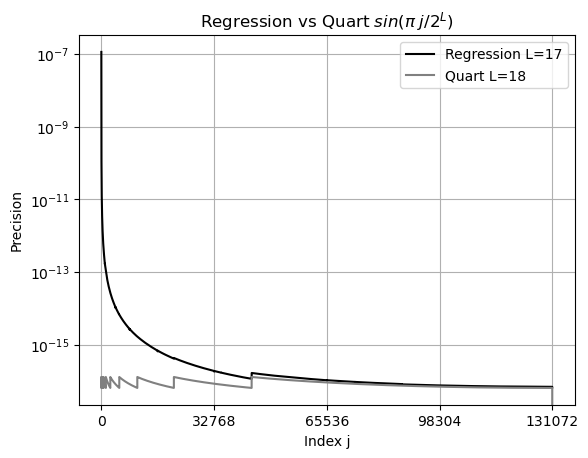

In [35]:
ax = df[df['Order'] == 17].plot(x='Index', y='Regr Precision',  c='black', ls='-', label='Regression L=17')
df.plot(ax = ax, x='Index', y='Quart Precision', c='gray', ls='-', label='Quart L=18',
        logy=True, grid=True, xlabel="Index j", ylabel = 'Precision', xticks = range(0, 2**17 + 1, 2**15),
        title=r'Regression vs Quart $sin(\pi\; j/2^L)$')

<AxesSubplot:title={'center':'Regression vs Quart $sin(\\pi\\; j/2^L)$'}, xlabel='Index j', ylabel='Precision or Uncertainty'>

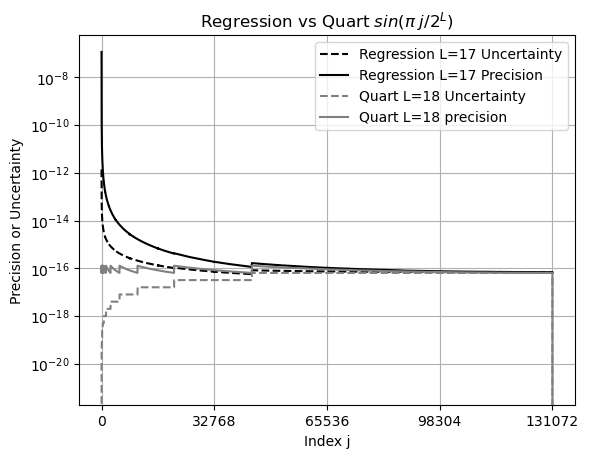

In [36]:
ax = df[df['Order'] == 17].plot(x='Index', y='Regr Uncertainty', c='black', ls='--', label='Regression L=17 Uncertainty')
df[df['Order'] == 17].plot(ax=ax, x='Index', y='Regr Precision', c='black', ls='-', label='Regression L=17 Precision') 
df.plot(ax = ax, x='Index', y='Quart Uncertainty', c='gray', ls='--', label='Quart L=18 Uncertainty')
df.plot(ax = ax, x='Index', y='Quart Precision', c='gray', ls='-', label='Quart L=18 precision',
        logy=True, grid=True, xlabel="Index j", ylabel = 'Precision or Uncertainty', xticks = range(0, 2**17 + 1, 2**15),
        title=r'Regression vs Quart $sin(\pi\; j/2^L)$')

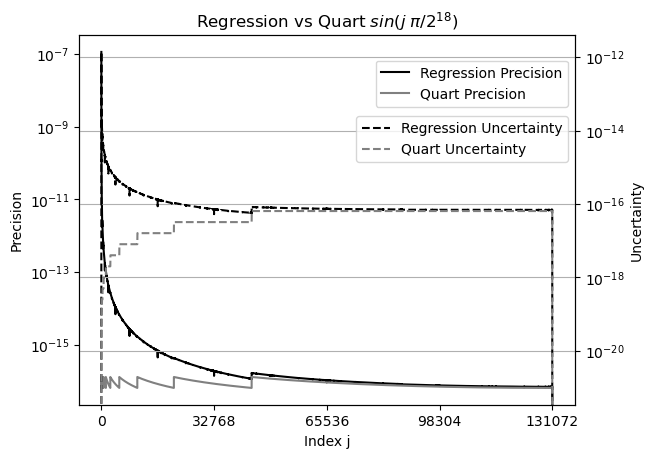

In [39]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(df['Index'], df['Regr Precision'], c='black', ls='-', label='Regression Precision')
ax.plot(df['Index'], df['Quart Precision'], c='gray', ls='-', label='Quart Precision')
ax.set_xlabel('Index j')
ax.set_ylabel('Precision')
ax.set_title(r'Regression vs Quart $sin(j\; \pi/2^{18})$')
ax.set_xticks(range(0, 2**17 + 1, 2**15))

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.plot(df['Index'], df['Regr Uncertainty'], c='black', ls='--', label='Regression Uncertainty')
ax2.plot(df['Index'], df['Quart Uncertainty'], c='gray', ls='--', label='Quart Uncertainty')
ax2.set_ylabel('Uncertainty')

plt.grid(True)
ax.legend(bbox_to_anchor=(1, 0.95))
ax2.legend(bbox_to_anchor=(1, 0.8))